In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
X = pd.read_csv("diabetes_dataset.csv")

# Descrevendo os dados

In [3]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,572.0,4.106643,3.446995,0.000,1.000,3.0000,6.0000,17.000
Glucose,567.0,121.647266,30.132084,44.000,100.000,117.0000,140.0000,199.000
BloodPressure,537.0,73.150838,12.347184,30.000,65.000,72.0000,80.0000,122.000
SkinThickness,345.0,29.356522,10.433503,7.000,22.000,30.0000,36.0000,99.000
Insulin,198.0,156.934343,119.066934,16.000,77.500,129.5000,185.0000,744.000
BMI,561.0,32.327629,6.735437,18.200,27.500,32.0000,36.6000,57.300
DiabetesPedigreeFunction,572.0,0.459121,0.336124,0.078,0.236,0.3445,0.6055,2.329
Age,572.0,34.043706,12.103893,21.000,24.000,30.0000,41.0000,81.000
Outcome,572.0,0.358392,0.479948,0.000,0.000,0.0000,1.0000,1.000


In [4]:
X.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
from scipy import stats

z_scores = np.abs(stats.zscore(X))
threshold = 3
outliers = (z_scores > threshold)

print(outliers.any())

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool


# Tratando os dados

In [6]:
X.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


# Visualizando os dados

Visualizando a distribuição

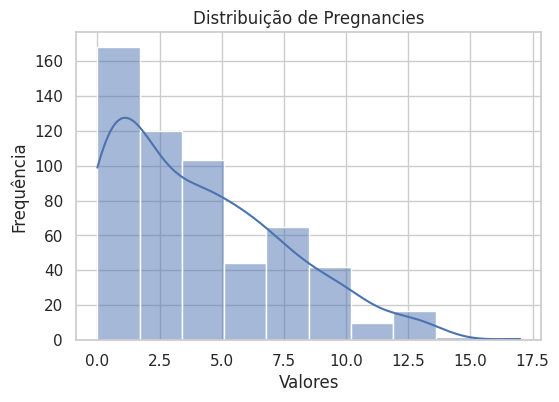

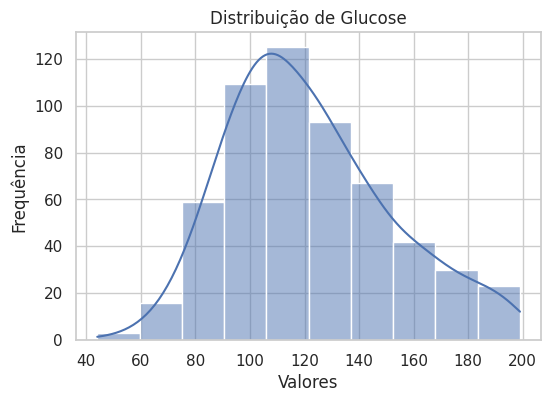

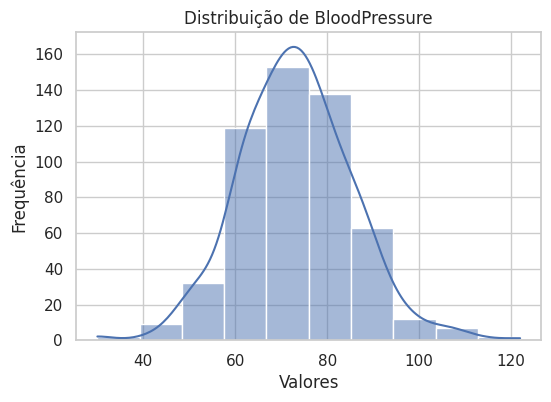

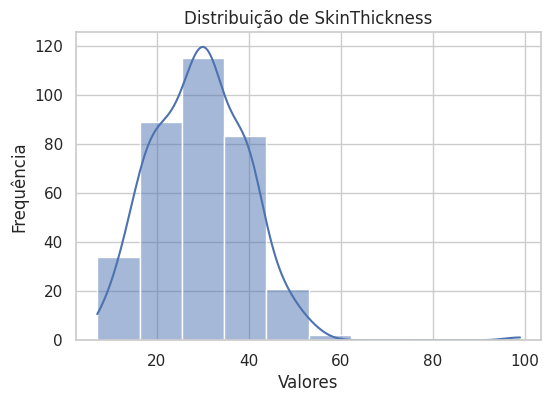

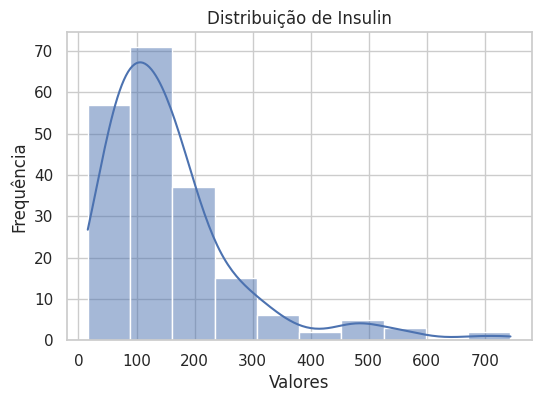

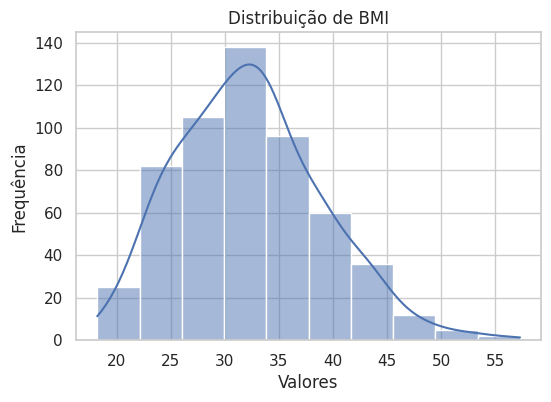

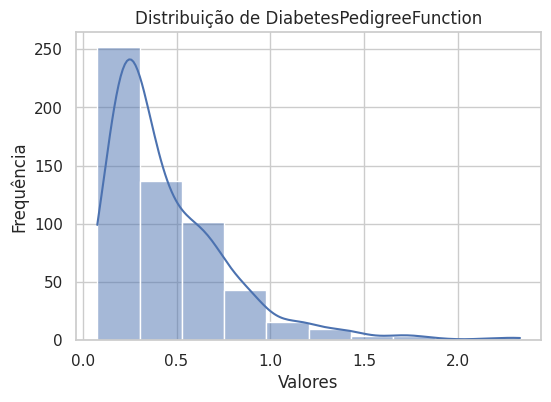

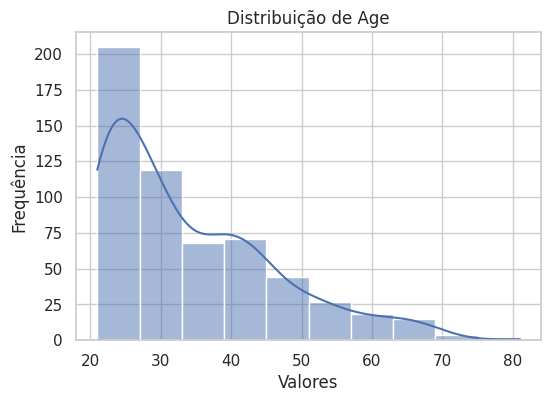

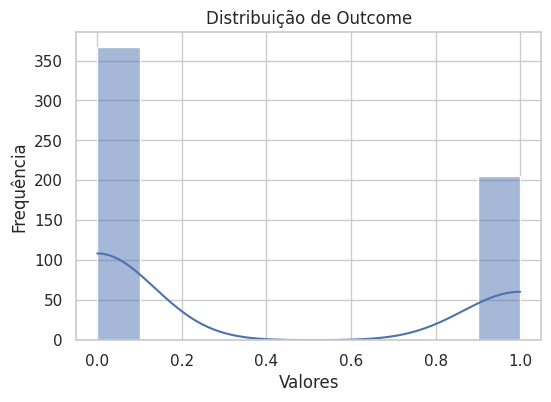

In [8]:
sns.set(style="whitegrid")

for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=X[column], bins=10, kde=True)
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de {column}')
    plt.show()

# Tratando SkinThickness e Insulin

In [9]:
X['SkinThickness'].fillna(X['SkinThickness'].mean(), inplace = True)
X['Insulin'].fillna(X['Insulin'].mean(), inplace = True)

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,156.934343,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,156.934343,26.6,0.351,31,0
2,8,183.0,64.0,29.356522,156.934343,23.3,0.672,32,1
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.356522,156.934343,25.6,0.201,30,0


In [11]:
X = X.dropna()

# Visualizando a relação entre as features

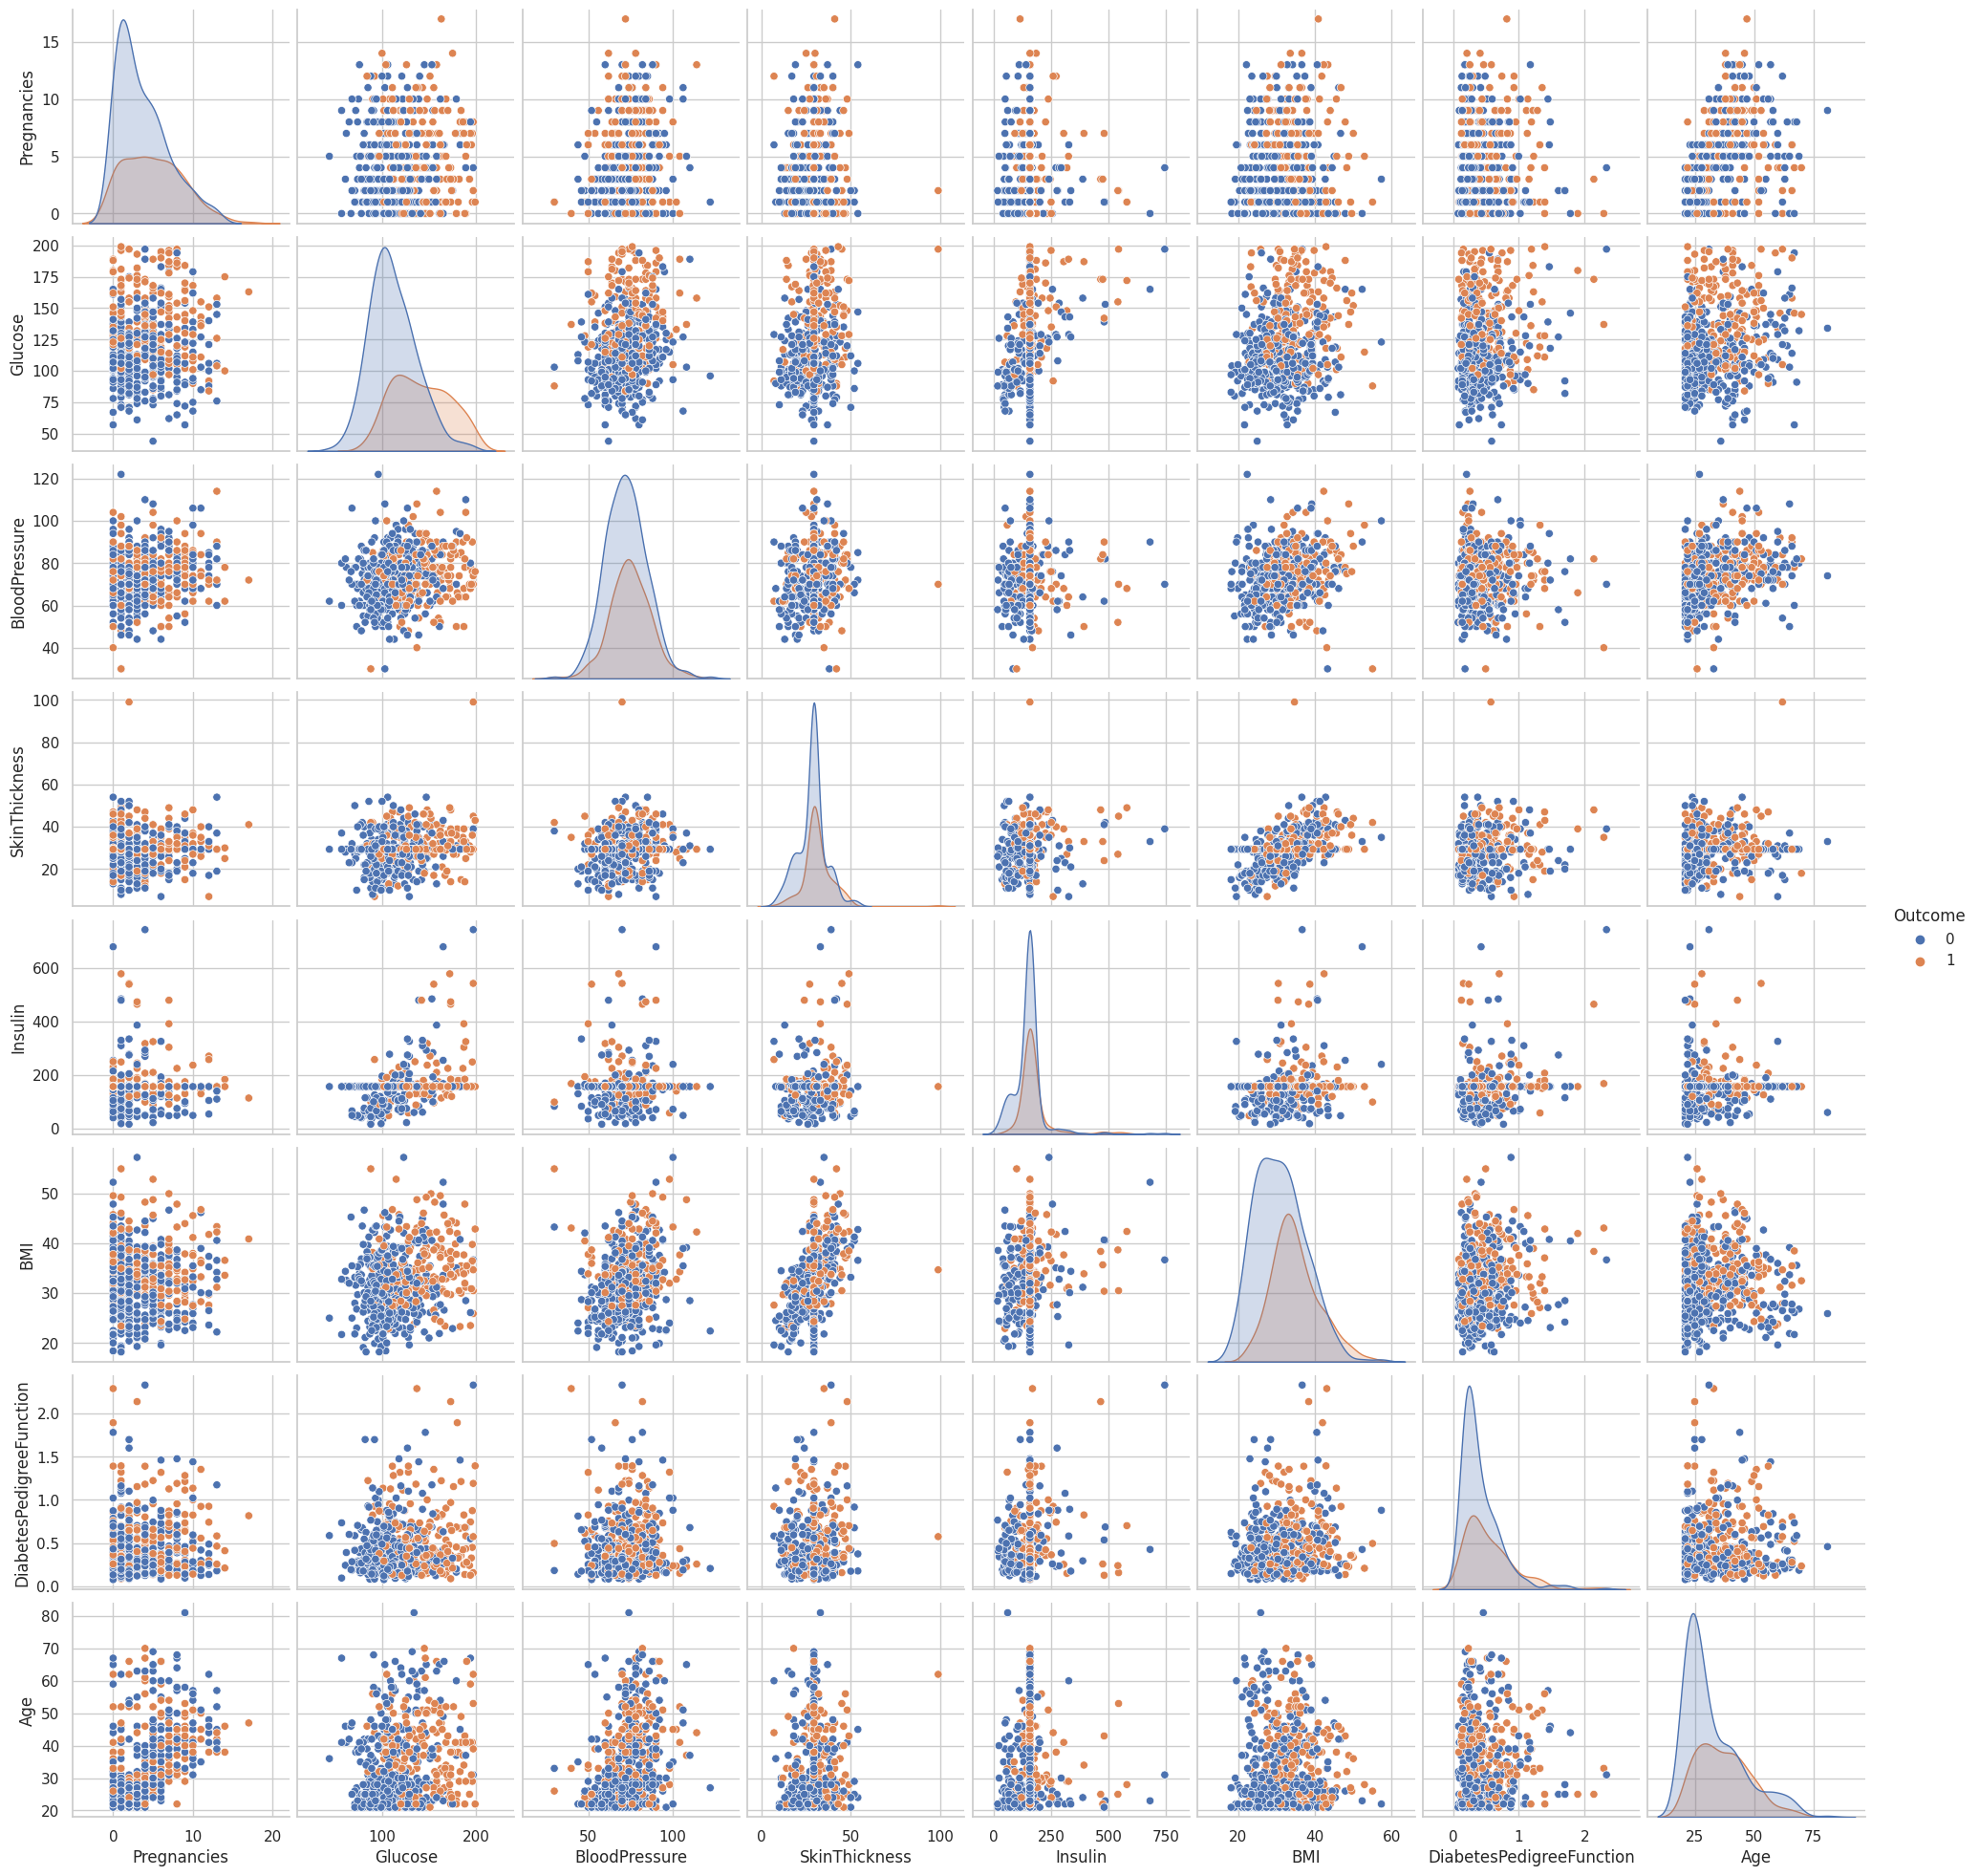

In [12]:
p=sns.pairplot(X, hue = 'Outcome')

# Normalizando os dados

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
X_norm = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_norm, columns=X.columns)

X_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.456522,0.304348,0.193591,0.393862,0.243892,0.483333,1.0
1,0.058824,0.264516,0.391304,0.239130,0.193591,0.214834,0.121279,0.166667,0.0
2,0.470588,0.896774,0.369565,0.243006,0.193591,0.130435,0.263883,0.183333,1.0
3,0.000000,0.600000,0.108696,0.304348,0.208791,0.636829,0.981786,0.200000,1.0
4,0.294118,0.464516,0.478261,0.243006,0.193591,0.189258,0.054642,0.150000,0.0


# Gerando os datasets

In [15]:
# X.to_csv("dados_tratados.csv", index=False)
X_normalized.to_csv("dados_normalizados.csv", index=False)

In [16]:
X_test = pd.read_csv("diabetes_app.csv")

X_norm_test = scaler.fit_transform(X_test)
X_normalized_test = pd.DataFrame(X_norm_test, columns=X_test.columns)

X_normalized_test.to_csv("dados_normalizados_test.csv", index=False)